# Welcome to the IMDb Movie Rating Prediction project!

The dataset for this project originates from IMDb.com and contains a comprehensive collection of Indian movies available on the platform alongside important information about them to find valuable insights.

The primary objective of this exploratory data analysis is to uncover trends, patterns, and insights within the dataset. Through analysis, we aim to gain a deeper understanding of the Indian movie landscape, enabling us to draw valuable conclusions and predict the rating of Indian movies.

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Read the dataset
df = pd.read_csv('C:/Users/yomna/codsoft/IMDbMovieRating/Dataset/IMDbMovies.csv', encoding='latin-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
# Understanding the dataset through looking at the dataset's shape, datatypes, nulls, Summary Statistics and more
df.shape

(15509, 10)

In [4]:
# Dataset's summary statistics
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [5]:
# Checking each column's datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
# Calculating the total number of rows
total_rows = df.shape[0]

# Calculating the number of missing values per column
missing_values = df.isnull().sum()

# Calculatung the percentage of missing values
percentage_missing = (missing_values / total_rows) * 100
percentage_missing =  round(percentage_missing, 2)
percentage_missing

Name         0.00
Year         3.40
Duration    53.32
Genre       12.10
Rating      48.94
Votes       48.93
Director     3.39
Actor 1     10.43
Actor 2     15.37
Actor 3     20.27
dtype: float64

In [7]:
# Checking if there is duplicates
duplicates = df[df.duplicated(['Name', 'Year'], keep=False)]

if not duplicates.empty:
    print("Number of duplicates: \n",duplicates.count(), "\n")
    print(duplicates[['Name', 'Year']])
else:
    print("No duplicates found in 'Name' and 'Year' columns.")

Number of duplicates: 
 Name        48
Year        46
Duration    14
Genre       36
Rating      12
Votes       12
Director    44
Actor 1     38
Actor 2     34
Actor 3     26
dtype: int64 

                            Name    Year
135         A Ballad of Maladies  (2016)
136         A Ballad of Maladies  (2016)
585                      Achanak  (1988)
586                      Achanak  (1988)
953                        Amrit  (1941)
954                        Amrit  (1941)
1249   Arab Ka Sona - Abu Kaalia  (1979)
1250   Arab Ka Sona - Abu Kaalia  (1979)
1768                     Balidan  (1992)
1769                     Balidan  (1992)
2654                      Campus  (2000)
2655                      Campus  (2000)
4133                        Dost  (1944)
4137                        Dost  (1944)
4692                     Fighter  (2022)
4693                     Fighter  (2022)
4722     First Time - Pehli Baar  (2009)
4723     First Time - Pehli Baar  (2009)
6062            India's Daughter

## Problems with the dataframe:

while exploring the dataframe, we found the following issues:
- Some datatypes are not correct according to the data in the column
- Missing values in all columns except the column Name
- Duplicate rows

#### Current datatype:
- Name     -   object
- Year     -   object
- Duration -   object
- Genre    -   object
- Rating   -   Float
- Votes    -   object
- Director -   object
- Actor 1  -   object
- Actor 2  -   object
- Actor 3  -   object

#### Datatypes will be converted to:
- Name     -   object
- <b>Year     -   int</b>
- <b>Duration -   int</b>
- Genre    -   object
- Rating   -   Float
- <b>Votes    -   int</b>
- Director -   object
- Actor 1  -   object
- Actor 2  -   object
- Actor 3  -   object

#### Missing value percentage per columns:
- Name         0.00%
- Year         3.40%
- Duration    53.32%
- Genre       12.10%
- Rating      48.94%
- Votes       48.93%
- Director     3.39%
- Actor 1     10.43%
- Actor 2     15.37%
- Actor 3     20.27%

#### How missing values well be handled per column : 
- Year     -   3.40%   - Drop the rows
- Duration -   53.32%  - Replace with Mean 
- Genre    -   12.10%  - Drop the rows
- Rating   -   48.94%  - Replace wit Mean 
- Votes    -   48.93%  - Replace with 0 
- Director -   3.39%   - Drop the rows
- Actor 1  -   10.43%  - Drop the rows 
- Actor 2  -   15.37%  - Drop the rows 
- Actor 3  -   20.27%  - Drop the rows 

#### Duplicates
Each duplicate will be dropped so that each column will not be repeated twice

In [8]:
# Duration - 8269 - Replace with Mean

# Removing characters 
df['Duration'] = df['Duration'].astype(str).str.extract('(\d+)').replace('', np.nan)

# Replacing missing values with value of -1
df['Duration'].fillna(-1, inplace=True)

# Converting 'Duration' to integer 
df['Duration'] = df['Duration'].astype(int)

# Replacing sentinel value back with NaN
df['Duration'].replace(-1, pd.NA, inplace=True)

# Calculating the Mean
mean_Duration = df['Duration'].mean()

# Replacing missing values with the calculated mean
df['Duration'].fillna(mean_Duration, inplace=True)

# Checking for null values 
null_num_Duration = df['Duration'].isna().sum()
print('number of Null values in column Duration =', null_num_Duration) # No more missing values

# Printing values
df['Duration']

number of Null values in column Duration = 0


0        128.126519
1        109.000000
2         90.000000
3        110.000000
4        105.000000
            ...    
15504    128.126519
15505    129.000000
15506    128.126519
15507    128.126519
15508    130.000000
Name: Duration, Length: 15509, dtype: float64

In [9]:
# Rating - 7590 - Replace wit Mean

# Replacing missing values with value of -1
df['Rating'].fillna(-1, inplace=True)

# Replacing sentinel value back with NaN
df['Rating'].replace(-1, pd.NA, inplace=True)

# Calculating the Mean
mean_Rating = df['Rating'].mean()

# Replacing missing values with the calculated mean
df['Rating'].fillna(mean_Rating, inplace=True)

# Checking for null values in the column 
null_num_Rating = df['Rating'].isna().sum()
print('number of Null values in column Rating =',null_num_Rating) # No more missing values 

# Printing values
df['Rating']

number of Null values in column Rating = 0


0        5.841621
1        7.000000
2        5.841621
3        4.400000
4        5.841621
           ...   
15504    4.600000
15505    4.500000
15506    5.841621
15507    5.841621
15508    6.200000
Name: Rating, Length: 15509, dtype: float64

In [10]:
# Votes - 7589 - Replace with 0
df['Votes'].fillna(0.0, inplace=True)

# Removing characters  
df['Votes'] = df['Votes'].astype(str).str.extract('(\d+)').replace('', np.nan)

# Converting 'Votes' to integer 
df['Votes'] = df['Votes'].astype(int)

# Checking for null values in the column 
null_num_Votes = df['Votes'].isna().sum()
print('number of Null values in column Votes =',null_num_Votes) # No more missing values 

# Printing values
df['Votes']

number of Null values in column Votes = 0


0          0
1          8
2          0
3         35
4          0
        ... 
15504     11
15505    655
15506      0
15507      0
15508     20
Name: Votes, Length: 15509, dtype: int32

In [11]:
# Dropping the missing rows for other columns

''' 
Year      -  3.40%   -  Drop the rows
Genre     -  12.10%  -  Drop the rows
Director  -  3.39%   -  Drop the rows
Actor 1   -  10.43%  -  Drop the rows
Actor 2   -  15.37%  -  Drop the rows
Actor 3   -  20.27%  -  Drop the rows
'''

df = df.dropna(subset=['Year'])
df = df.dropna(subset=['Genre'])
df = df.dropna(subset=['Director'])
df = df.dropna(subset=['Actor 1'])
df = df.dropna(subset=['Actor 2'])
df = df.dropna(subset=['Actor 3'])

# Calculating the total number of rows
total_rows = df.shape[0]

# Calculating the number of missing values per column
missing_values = df.isnull().sum()

# Calculatung the percentage of missing values
percentage_missing = (missing_values / total_rows) * 100
percentage_missing =  round(percentage_missing, 2)
percentage_missing


Name        0.0
Year        0.0
Duration    0.0
Genre       0.0
Rating      0.0
Votes       0.0
Director    0.0
Actor 1     0.0
Actor 2     0.0
Actor 3     0.0
dtype: float64

In [12]:
# Converting 'Year' to int
df['Year'] = df['Year'].str.extract(r'(\d{4})')
df['Year'] = df['Year'].astype(int)
df['Year']

1        2019
2        2021
3        2019
4        2010
5        1997
         ... 
15502    1979
15503    1989
15504    1988
15505    1999
15508    1998
Name: Year, Length: 11086, dtype: int32

In [13]:
# Checking datatypes after converting 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11086 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11086 non-null  object 
 1   Year      11086 non-null  int32  
 2   Duration  11086 non-null  float64
 3   Genre     11086 non-null  object 
 4   Rating    11086 non-null  float64
 5   Votes     11086 non-null  int32  
 6   Director  11086 non-null  object 
 7   Actor 1   11086 non-null  object 
 8   Actor 2   11086 non-null  object 
 9   Actor 3   11086 non-null  object 
dtypes: float64(2), int32(2), object(6)
memory usage: 866.1+ KB


In [14]:
# Dropping Duplicate rows
df.drop_duplicates(subset=['Name', 'Year'], inplace=True)

# Checking if there is anymore duplicates
duplicates = df[df.duplicated(['Name', 'Year'], keep=False)]

if not duplicates.empty:
    print("Number of duplicates: \n",duplicates.count(), "\n")
    print(duplicates[['Name', 'Year']])
else:
    print("No duplicates found in 'Name' and 'Year' columns.")

No duplicates found in 'Name' and 'Year' columns.


In [17]:
# Saving the cleaned version of the dataset
df.to_csv('C:/Users/yomna/codsoft/IMDbMovieRating/Dataset/Movie_cleaned_data.csv', index=False)

## Forming Hypotheses

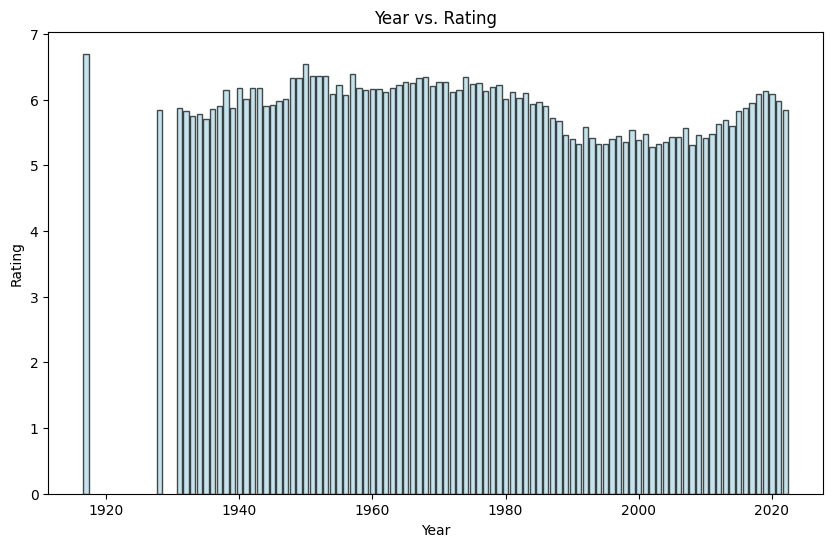

In [18]:
# Hypothesis one:there is a specific year that stands out with exceptionally high ratings

# Group by year
plt.figure(figsize=(10, 6))
df_grouped = df.groupby(df['Year'])['Rating'].mean()
plt.bar(df_grouped.index, df_grouped.values, color='lightblue', alpha=0.7, edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Year vs. Rating')
plt.show()

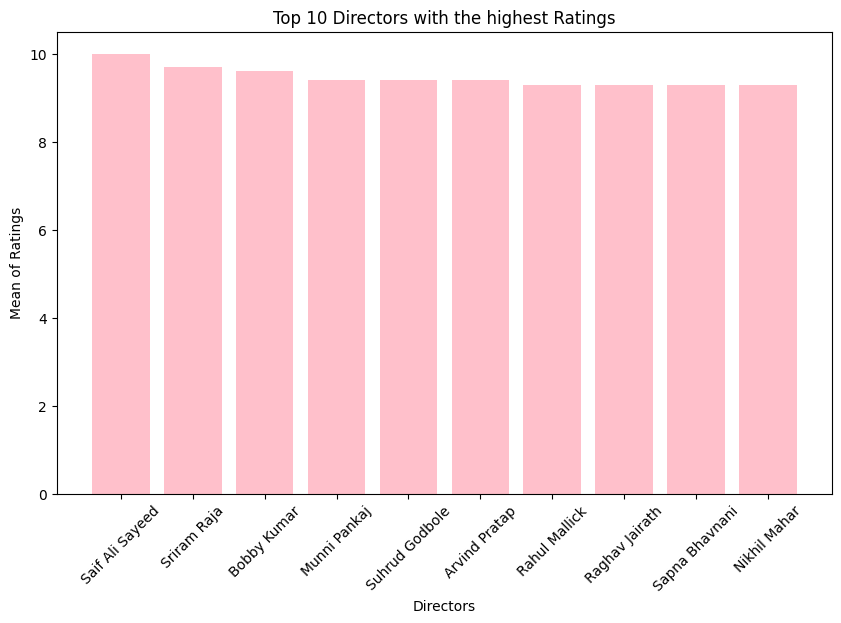

In [19]:
# Hypothesis Two: Movies by esteemed Directors tends to have high ratings
# Group by director and with the mean of their ratings
director_ratings = df.groupby('Director')['Rating'].mean()

# Arranging directors by mean rating
directors_sorted_by_rating = director_ratings.sort_values(ascending=False)

# Selecting directors with the highest mean ratings
top_directors = directors_sorted_by_rating.head(10) 

# visualizing results
plt.figure(figsize=(10,6))
plt.bar(top_directors.index, top_directors.values, color='pink')
plt.xlabel('Directors')
plt.ylabel('Mean of Ratings')
plt.title('Top 10 Directors with the highest Ratings')
plt.xticks(rotation=45)
plt.show()

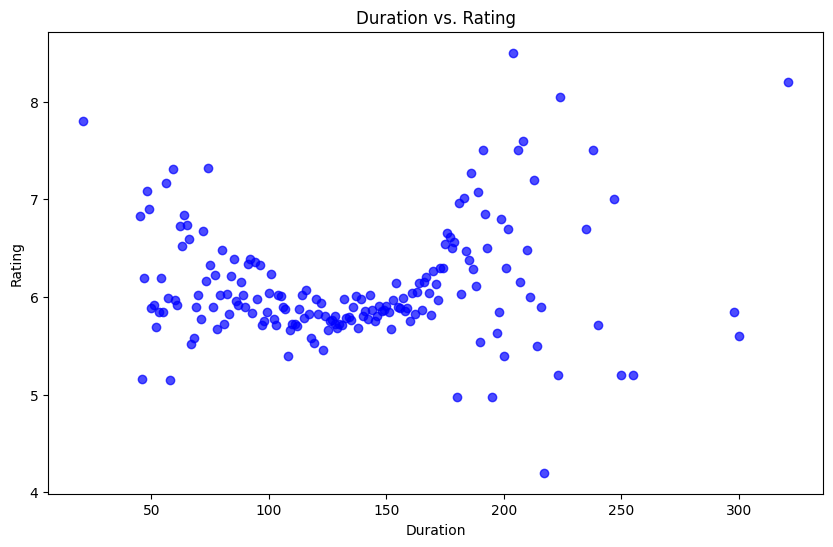

In [20]:
# Hypothesis Three: Duration has an Influence on Ratings
df_grouped = df.groupby(df['Duration'])['Rating'].mean()
plt.figure(figsize=(10, 6))
plt.scatter(df_grouped.index, df_grouped.values, color='blue', alpha=0.7)
plt.xlabel('Duration')
plt.ylabel('Rating')
plt.title('Duration vs. Rating')
plt.show()

In [21]:
# Hypothesis Four: Movies by esteemed actors tends to have high ratings
# Checking Actor 1 
df_grouped_actor1 = df.groupby(df['Actor 1'])['Rating'].mean()

# Arranging Actor 1 by mean rating
actor1_sorted_by_rating = df_grouped_actor1.sort_values(ascending=False)

# Selecting  Actor 1 with the highest mean ratings
top_actor1 = actor1_sorted_by_rating.head(10) 

print('Top 10 Actors with the highest ratings from',top_actor1, '\n')
''''''''''''''''''''''''''''''''''''''''''''''''''

# Checking Actor 2 
df_grouped_actor2 = df.groupby(df['Actor 2'])['Rating'].mean()

# Arranging Actor 2 by mean rating
actor2_sorted_by_rating = df_grouped_actor2.sort_values(ascending=False)

# Selecting Actor 2 with the highest mean ratings
top_actor2 = actor2_sorted_by_rating.head(10) 
print('Top 10 Actors with the highest ratings from',top_actor2, '\n')

''''''''''''''''''''''''''''''''''''''''''''''''''
# Checking Actor 3
df_grouped_actor3 = df.groupby(df['Actor 3'])['Rating'].mean()

# Arranging Actor 3 by mean rating
actor3_sorted_by_rating = df_grouped_actor3.sort_values(ascending=False)

# Selecting  Actor 3 with the highest mean ratings
top_actor3 = actor3_sorted_by_rating.head(10) 

print('Top 10 Actors with the highest ratings from',top_actor3 , '\n')

Top 10 Actors with the highest ratings from Actor 1
Ahaan Jha            10.0
Raj Banerjee          9.7
Nishi Neha Mishra     9.4
Dharmendra Ahir       9.4
Vaibhav Khisti        9.4
Tejaswini Manogna     9.3
Amrit                 9.3
Prashant Chaubey      9.3
Vishwa Bhanu          9.3
Vijay Mahar           9.3
Name: Rating, dtype: float64 

Top 10 Actors with the highest ratings from Actor 2
Mahesh Narayan     10.0
Emon Chatterjee     9.7
Ashfaq              9.6
Awanish Kotnal      9.4
Pankaj Kamal        9.4
Sangam Shukla       9.3
R.S. Bhist          9.3
Laj Badlani         9.3
Dimple Chauhan      9.3
Triyug Mantri       9.3
Name: Rating, dtype: float64 

Top 10 Actors with the highest ratings from Actor 3
Rajasree Rajakumari    10.0
Purshottam Mulani       9.7
Fasih Choudhry          9.6
Rakhi Mansha            9.4
Akash Kumar             9.4
Amitabh Gupta           9.3
Paras Zutshi            9.3
Chaho Bhara             9.3
Sapna Das               9.3
K.N. Dixit              9.3
Na

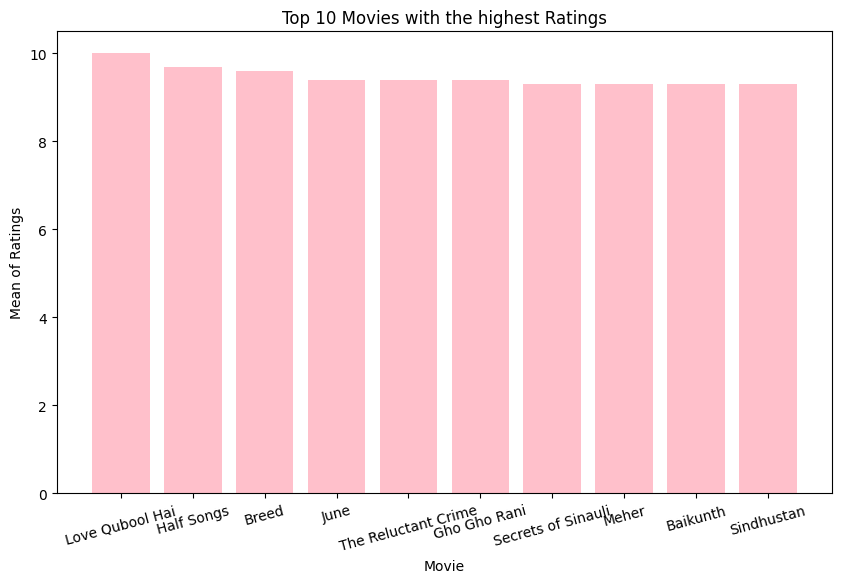

In [22]:
# Hypothesis Five: there's specific movies that stand out with exceptionally high ratings
df_name = df.groupby(df['Name'])['Rating'].mean()

# Arranging name by mean rating
df_name_by_rating = df_name.sort_values(ascending=False)

# Selecting movies with the highest mean ratings
top_movies = df_name_by_rating.head(10) 

# visualizing results
plt.figure(figsize=(10,6))
plt.bar(top_movies.index, top_movies.values, color='pink')
plt.xlabel('Movie')
plt.ylabel('Mean of Ratings')
plt.title('Top 10 Movies with the highest Ratings')
plt.xticks(rotation=15)
plt.show()

### In conclusion, the analysis reveals several key findings

<b>Yearly Trends in Ratings</b>
- The analysis of ratings across different years uncovered a consistent pattern. While there were fluctuations, no singular year stood out with significantly higher ratings.

<b>Director's Impact on Ratings</b>
- The examination of directors based on their mean ratings showcased a select group of directors who consistently produced movies with remarkable ratings. These directors demonstrated a consistent commitment to quality filmmaking.

<b>Duration's Influence on Ratings</b>
- We observed a moderate positive correlation between movie duration and ratings. This suggests that, on average, longer movies tend to receive higher ratings. However, outliers were present, indicating that duration alone is not the sole determinant of a movie's success.

<b>Lead Actors and Audience Reception</b>
- Analyzing the lead actors (Actor 1, Actor 2, and Actor 3) revealed interesting patterns. there were instances where specific actors were associated with higher ratings.

<b>Notable Movies with Exceptional Ratings</b>
- We identified specific movies that distinguished themselves with exceptionally high ratings.